<a href="https://colab.research.google.com/github/cyrus723/my-first-binder/blob/main/FRED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Using the FRED API to get and display key macro series
FRED, a database maintained by the Federal Reserve Bank of St. Louis, is a realiable source of macroecononomic and financial data. The first step is to install the FRED API.  https://fred.stlouisfed.org/docs/api/fred/

In [12]:
pip install fredapi 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
from fredapi import Fred 

Next we will download the FRED API, ask the FED for an ID (go here https://research.stlouisfed.org/useraccount/apikeys), and enter it.

In [14]:
##############   please get your own API KEY instead of using mine   ####################
fred = Fred(api_key='52b55ac11946f5749148befd9094e6be') # this key won't work.

In [15]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [16]:
gdp = fred.get_series('GDPC1', observation_start='1995-1-1') # Seasonally adjusted real GDP # seasonally ajusted non-fram employment in thousands
empl = fred.get_series('PAYEMS', observation_start='1995-1-1') # seasonally ajusted non-farm employment in thousands 
unemp =fred.get_series('UNRATE', observation_start='1995-1-1') # seasonally ajusted unemployment rate in percent
SP500=fred.get_series('SP500', observation_start='1995-1-1')  # only starts in 2010 at Fred for some reason
consumer_confidence=fred.get_series('UMCSENT', observation_start='1995-1-1') 
dollar_euro=fred.get_series('DEXUSEU', observation_start='1995-1-1') 
civilian_labor_force=fred.get_series('CLF16OV', observation_start='1995-1-1') 
PPI = fred.get_series('PPIACO', observation_start='1995-1-1') 
CO2_emission = fred.get_series('EMISSCO2TOTVTTTOUSA', observation_start='1995-1-1') 

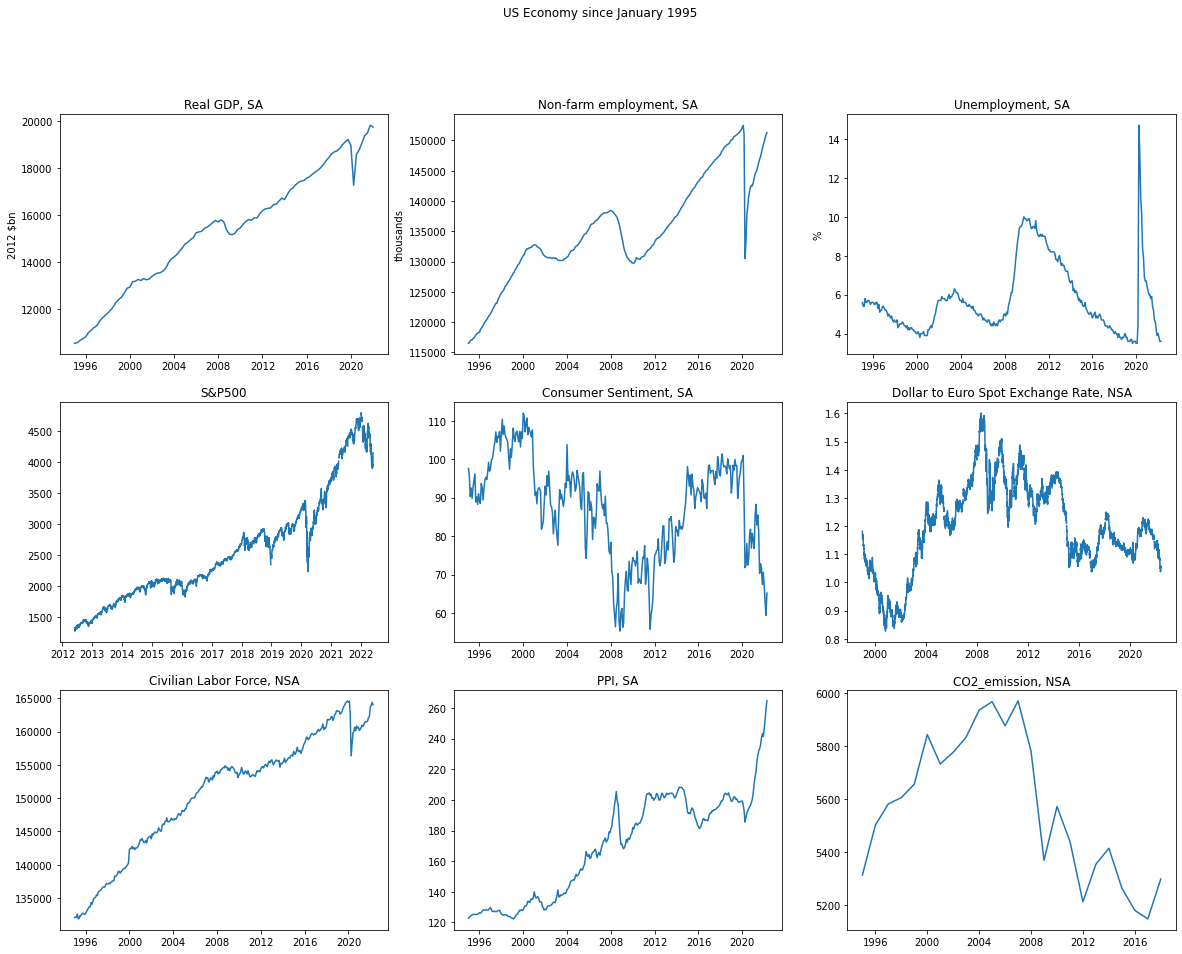

In [17]:
fig, axs  = plt.subplots(3, 3,figsize=(20, 15))
fig.suptitle('US Economy since January 1995')

# plt.subplot(221)

axs[0][0].plot(gdp.index,gdp.values)
axs[0][0].set_title("Real GDP, SA")
axs[0,0].set_ylabel("2012 $bn")

axs[0][1].plot(empl.index,empl.values)
axs[0][1].set_title("Non-farm employment, SA")
axs[0,1].set_ylabel("thousands")

axs[0][2].plot(unemp.index,unemp.values)
axs[0][2].set_title("Unemployment, SA")
axs[0,2].set_ylabel("%")

axs[1][0].plot(SP500.index,SP500.values)
axs[1][0].set_title("S&P500")

axs[1][1].plot(consumer_confidence.index,consumer_confidence.values)
axs[1][1].set_title("Consumer Sentiment, SA")

axs[1][2].plot(dollar_euro.index,dollar_euro.values)
axs[1][2].set_title("Dollar to Euro Spot Exchange Rate, NSA")

axs[2][0].plot(civilian_labor_force.index, civilian_labor_force.values)
axs[2][0].set_title("Civilian Labor Force, NSA")

axs[2][1].plot(PPI.index,PPI.values)
axs[2][1].set_title("PPI, SA")

axs[2][2].plot(CO2_emission.index,CO2_emission.values)
axs[2][2].set_title("CO2_emission, NSA")


plt.show()

In [18]:
type(gdp)

pandas.core.series.Series

In [19]:
consumer_confidence

1995-01-01    97.6
1995-02-01    95.1
1995-03-01    90.3
1995-04-01    92.5
1995-05-01    89.8
              ... 
2021-12-01    70.6
2022-01-01    67.2
2022-02-01    62.8
2022-03-01    59.4
2022-04-01    65.2
Length: 328, dtype: float64

In [20]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
import statsmodels.graphics.tsaplots as tsaplt

In [4]:
dmbp = pd.read_csv("http://web.pdx.edu/~crkl/ceR/data/dmbp.txt",sep='\s+',
                   header=None,names=['xrate','friday'],nrows=1974)
dmbp

,xrate,friday
0,0.125333,0.0
1,0.028874,0.0
2,0.063462,0.0
3,0.226719,1.0
4,-0.214267,0.0
...,...,...
1969,-0.408540,1.0
1970,-0.030468,1.0
1971,-0.117546,1.0
1972,-0.231271,0.0


In [21]:
dollar_euro=fred.get_series('DEXUSEU', observation_start='1995-1-1') 
type(dollar_euro)  #One-dimensional ndarray with axis labels (including time series)

pandas.core.series.Series

In [42]:
print(dollar_euro.shape)
print(dollar_euro.size)
print(dollar_euro.dtype)
print(dollar_euro.astype)
print(dollar_euro.attrs)
print(dollar_euro.max)
print(dollar_euro.empty)
dollar_euro.isnull().sum()    #232 missing vlues
dollar_euro.dropna(inplace=True)   #drop 232
dollar_euro.isnull().sum()   #check

(6100,)
6100
float64
<bound method NDFrame.astype of 1999-01-04    1.1812
1999-01-05    1.1760
1999-01-06    1.1636
1999-01-07    1.1672
1999-01-08    1.1554
               ...  
2022-05-16    1.0420
2022-05-17    1.0532
2022-05-18    1.0494
2022-05-19    1.0587
2022-05-20    1.0559
Length: 6100, dtype: float64>
{}
<bound method NDFrame._add_numeric_operations.<locals>.max of 1999-01-04    1.1812
1999-01-05    1.1760
1999-01-06    1.1636
1999-01-07    1.1672
1999-01-08    1.1554
               ...  
2022-05-16    1.0420
2022-05-17    1.0532
2022-05-18    1.0494
2022-05-19    1.0587
2022-05-20    1.0559
Length: 6100, dtype: float64>
False


0

In [72]:
dollar_euro2=dollar_euro.to_frame().reset_index()   # convert index into a column and convert it to DataFrame
print(dollar_euro2)
print(type(dollar_euro2))
dollar_euro2.info()
dollar_euro2.rename(columns={'index': "date", 0:'xrate'}, inplace=True)
dollar_euro2.info()
dollar_euro2['weekday']=pd.to_datetime(dollar_euro2['date']).dt.weekday



print(dollar_euro2)
dollar_euro2.info()
print(dollar_euro2)
dollar_euro2['friday'] = np.where(dollar_euro2['weekday'] == 4, 1, 0)
dollar_euro2.info()
print(dollar_euro2)

          index       0
0    1999-01-04  1.1812
1    1999-01-05  1.1760
2    1999-01-06  1.1636
3    1999-01-07  1.1672
4    1999-01-08  1.1554
...         ...     ...
5863 2022-05-16  1.0420
5864 2022-05-17  1.0532
5865 2022-05-18  1.0494
5866 2022-05-19  1.0587
5867 2022-05-20  1.0559

[5868 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5868 entries, 0 to 5867
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   index   5868 non-null   datetime64[ns]
 1   0       5868 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 91.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5868 entries, 0 to 5867
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    5868 non-null   datetime64[ns]
 1   xrate   5868 non-null   float64       
dtypes: datetime64[ns](1)

### Source code: Econometric Analysis by Examples
#### Copyright© 2020 by Kuan-Pin Lin and WISER-Club

In [75]:
lm2 = sm.OLS.from_formula('xrate~friday',data=dmbp).fit()
print(lm2.summary())

lm1 = sm.OLS.from_formula('xrate~1',data=dmbp).fit()
print(lm1.summary())


                            OLS Regression Results                            
Dep. Variable:                  xrate   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4440
Date:                Mon, 30 May 2022   Prob (F-statistic):              0.505
Time:                        21:20:09   Log-Likelihood:                -1310.9
No. Observations:                1974   AIC:                             2626.
Df Residuals:                    1972   BIC:                             2637.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0126      0.012     -1.041      0.2

In [76]:
lm2 = sm.OLS.from_formula('xrate~friday',data=dollar_euro2).fit()
print(lm2.summary())

lm1 = sm.OLS.from_formula('xrate~1',data=dollar_euro2).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  xrate   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.04123
Date:                Mon, 30 May 2022   Prob (F-statistic):              0.839
Time:                        21:24:35   Log-Likelihood:                 2475.2
No. Observations:                5868   AIC:                            -4946.
Df Residuals:                    5866   BIC:                            -4933.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1978      0.002    515.720      0.0

In [77]:

e = lm1.resid
e2 = e**2


/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


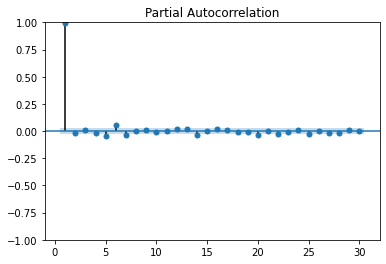

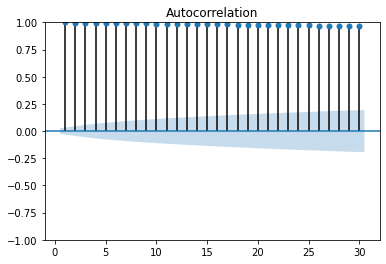

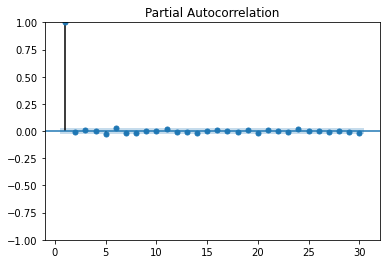

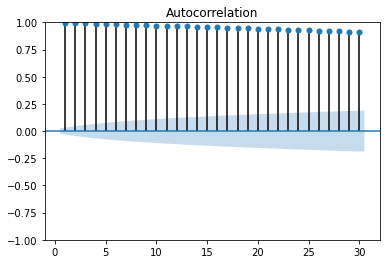

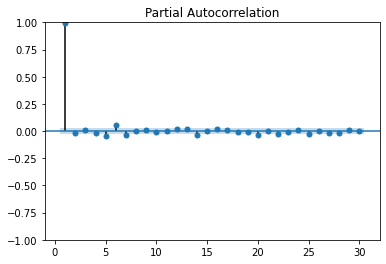

In [78]:


# time series analysis: identification
tsaplt.plot_acf(e, zero=False, lags=30)
tsaplt.plot_pacf(e, zero=False, lags=30)
tsaplt.plot_acf(e2, zero=False, lags=30)
tsaplt.plot_pacf(e2, zero=False, lags=30)


In [79]:
pip install arch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Iteration:      1,   Func. Count:      6,   Neg. LLF: -4962.314514188438
Iteration:      2,   Func. Count:     18,   Neg. LLF: -4977.472467550329
Iteration:      3,   Func. Count:     31,   Neg. LLF: -4977.638241929397
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -4977.638290276602
            Iterations: 7
            Function evaluations: 31
            Gradient evaluations: 3
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  xrate   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                4977.64
Distribution:                  Normal   AIC:                          -9947.28
Method:            Maximum Likelihood   BIC:                          -9920.57
                                        No. Observations:                 5868
Date:              

/usr/local/lib/python3.7/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.02518. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


ARCH-LM Test
H0: Standardized residuals are homoskedastic.
ARCH-LM Test
H1: Standardized residuals are conditionally heteroskedastic.
Statistic: 5334.8713
P-value: 0.0000
Distributed: chi2(10)
WaldTestStatistic, id: 0x7fe3839320d0

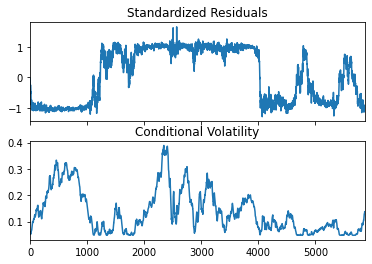

In [80]:

# https://arch.readthedocs.io/en/latest/univariate/introduction.html
from arch import arch_model

# GARCH(1,1), a common model
# default model: p=1,q=1, normal distribution
garch1 = arch_model(dollar_euro2.xrate).fit()
print(garch1.summary())
garch1.plot()
garch1.arch_lm_test(lags=10,standardized=True)


/usr/local/lib/python3.7/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.02518. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning
/usr/local/lib/python3.7/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.02518. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataSca

Iteration:      1,   Func. Count:      7,   Neg. LLF: -5020.327718598877
Iteration:      2,   Func. Count:     20,   Neg. LLF: -5033.742504521877
Iteration:      3,   Func. Count:     33,   Neg. LLF: -5035.578939260673
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -5035.578969695771
            Iterations: 7
            Function evaluations: 33
            Gradient evaluations: 3
                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:                  xrate   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:                5035.58
Distribution:                  Normal   AIC:                          -10061.2
Method:            Maximum Likelihood   BIC:                          -10027.8
                                        No. Observations:                 5868
Date:              

/usr/local/lib/python3.7/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.02518. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


Iteration:      1,   Func. Count:      7,   Neg. LLF: -4821.794788001211
Iteration:      2,   Func. Count:     24,   Neg. LLF: -4841.7585110206655
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -4841.758510811218
            Iterations: 6
            Function evaluations: 24
            Gradient evaluations: 2
                        Constant Mean - GARCH Model Results                         
Dep. Variable:                        xrate   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:                4841.76
Distribution:      Standardized Student's t   AIC:                          -9673.52
Method:                  Maximum Likelihood   BIC:                          -9640.13
                                              No. Observations:                 5868
Date:                      Mon, May 30 2022   Df 

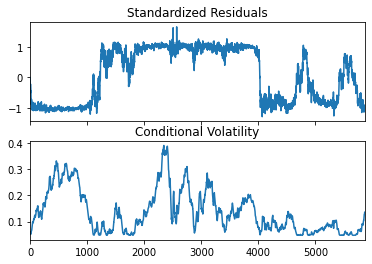

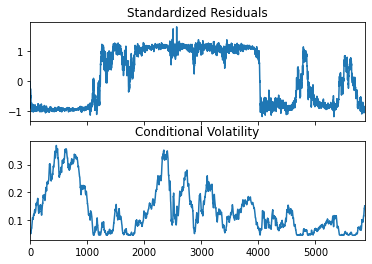

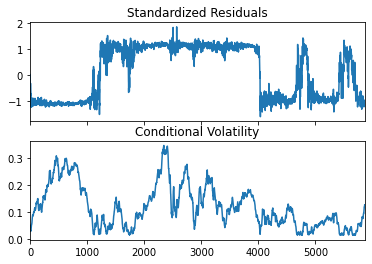

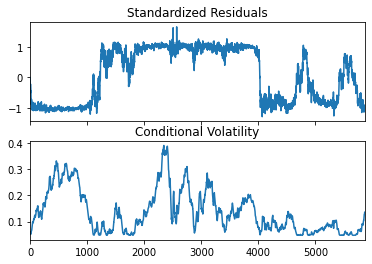

In [81]:

# Other modelspecifications are possible:
# GJR-GARCH(1,1) model, set o=1
garch2 = arch_model(dollar_euro2.xrate,p=1,o=1,q=1).fit()
print(garch2.summary())
garch2.plot()
# TARCH/ZARCH model, set power=1
garch3 = arch_model(dollar_euro2.xrate,p=1,o=1,q=1,power=1).fit()
print(garch3.summary())
garch3.plot()
# using Stdent's t distribution
garch4 = arch_model(dollar_euro2.xrate,dist='StudentsT').fit()
print(garch4.summary())
garch4.plot()

#https://fred.stlouisfed.org/docs/api/fred/#General_Documentation

Search for data series
You can always search for data series on the FRED website. But sometimes it can be more convenient to search programmatically. fredapi provides a search() method that does a fulltext search and returns a DataFrame of results.

In [ ]:
fred.search('consumer confidence')

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UMCSENT,UMCSENT,2022-04-07,2022-04-07,University of Michigan: Consumer Sentiment,1952-11-01,2022-02-01,Monthly,M,Index 1966:Q1=100,Index 1966:Q1=100,Not Seasonally Adjusted,NSA,2022-03-25 10:01:02-05:00,78,"At the request of the source, the data is dela..."
MICH,MICH,2022-04-07,2022-04-07,University of Michigan: Inflation Expectation,1978-01-01,2022-02-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2022-03-25 10:01:12-05:00,70,"Median expected price change next 12 months, S..."
CSCICP03USM665S,CSCICP03USM665S,2022-04-07,2022-04-07,Consumer Opinion Surveys: Confidence Indicator...,1960-01-01,2022-02-01,Monthly,M,Normalised (Normal=100),Normalised (Normal = 100),Seasonally Adjusted,SA,2022-03-10 10:39:06-06:00,49,OECD descriptor ID: CSCICP03 OECD unit ID: IXN...
CSCICP03EZM665S,CSCICP03EZM665S,2022-04-07,2022-04-07,Consumer Opinion Surveys: Confidence Indicator...,1973-01-01,2022-02-01,Monthly,M,Normalised (Normal=100),Normalised (Normal = 100),Seasonally Adjusted,SA,2022-03-10 10:47:08-06:00,22,OECD descriptor ID: CSCICP03 OECD unit ID: IXN...
UMCSENT1,UMCSENT1,2022-04-07,2022-04-07,University of Michigan: Consumer Sentiment (DI...,1952-11-01,1977-11-01,Not Applicable,NA,Index 1966:Q1=100,Index 1966:Q1=100,Not Seasonally Adjusted,NSA,2004-01-12 12:08:18-06:00,22,Please see FRED data series UMCSENT for monthl...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCDIOA17460Q156N,CCDIOA17460Q156N,2022-04-07,2022-04-07,CredAbility Consumer Distress Index for Clevel...,2005-01-01,2013-01-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2013-05-17 14:01:30-05:00,1,Overview of the Index The Index is a quarterly...
CCDIOA26420Q156N,CCDIOA26420Q156N,2022-04-07,2022-04-07,CredAbility Consumer Distress Index for Housto...,2005-01-01,2013-01-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2013-05-17 14:01:32-05:00,1,Overview of the Index The Index is a quarterly...
CCDIOA37100Q156N,CCDIOA37100Q156N,2022-04-07,2022-04-07,CredAbility Consumer Distress Index for Oxnard...,2005-01-01,2013-01-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2013-05-17 14:01:50-05:00,1,Overview of the Index The Index is a quarterly...


You can also search by release id and category id with various options

In [ ]:
df1 = fred.search_by_release(11)
df2 = fred.search_by_category(101, limit=10, order_by='popularity', sort_order='desc')

In [ ]:
df1

In [ ]:
df2

In [ ]:
info = fred.get_series_info('PAYEMS')
info['title']

'All Employees, Total Nonfarm'

In [ ]:
s = fred.get_series('SP500', observation_start='1/31/2014')
s.tail()

2022-03-30    4602.45
2022-03-31    4530.41
2022-04-01    4545.86
2022-04-04    4582.64
2022-04-05    4525.12
dtype: float64

In [ ]:
s = fred.get_series('SP500', observation_start='2014-09-02', observation_end='2014-09-05')
s.tail()

2014-09-02    2002.28
2014-09-03    2000.72
2014-09-04    1997.65
2014-09-05    2007.71
dtype: float64

You can also get a set of series IDs programmatically by release or category IDs. Several sorting options are also available. On the FRED website I know that the release ID 175 contains some personal income data. Let's fetch 5 most popular series in that set.

In [ ]:
personal_income_series = fred.search_by_release(175, limit=10, order_by='popularity', sort_order='desc')
personal_income_series['title']

series id
PCPI06037      Per Capita Personal Income in Los Angeles Coun...
SEAT653PCPI    Per Capita Personal Income in Seattle-Tacoma-B...
DALL148PCPI    Per Capita Personal Income in Dallas-Fort Wort...
ATLA013PCPI    Per Capita Personal Income in Atlanta-Sandy Sp...
SANF806PCPI    Per Capita Personal Income in San Francisco-Oa...
PCPI06073      Per Capita Personal Income in San Diego County...
PCPI12086      Per Capita Personal Income in Miami-Dade Count...
HOUS448PCPI    Per Capita Personal Income in Houston-The Wood...
SANA748PCPI    Per Capita Personal Income in San Antonio-New ...
PHOE004PCPI    Per Capita Personal Income in Phoenix-Mesa-Sco...
Name: title, dtype: object

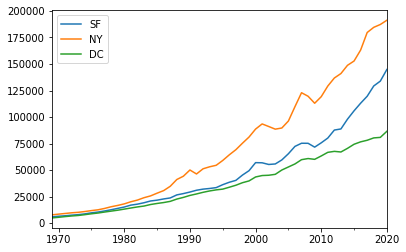

In [ ]:
import pandas as pd
df = {}
df['SF'] = fred.get_series('PCPI06075')
df['NY'] = fred.get_series('PCPI36061')
df['DC'] = fred.get_series('PCPI11001')
df = pd.DataFrame(df)
df.plot()